In [16]:
import cv2 as cv

# 行内显示图片
def cv2_imshow(image):
    return plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

def plt_format(image):
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 弹出窗口展示图片
def window_show(image):
    cv.imshow('image',image)
    cv.waitKey(10000)
    cv.destroyAllWindows()

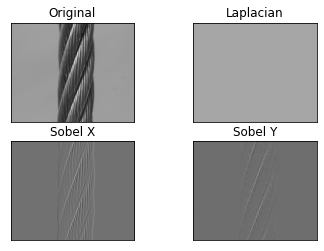

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('09.png',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

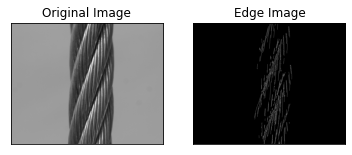

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('09.png',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [40]:
import numpy as np
import cv2 as cv
im = cv.imread('09.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(th2, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL,
cv.CHAIN_APPROX_SIMPLE)

In [ ]:
print(contours)

In [41]:
con = cv.drawContours(th2, contours, -1, (0,255,0), 3)

In [24]:
contours.sort(key=lambda c: cv.contourArea(c), reverse=True)

In [43]:
mask=cv.drawContours(th2,contours,0,255,cv.FILLED)

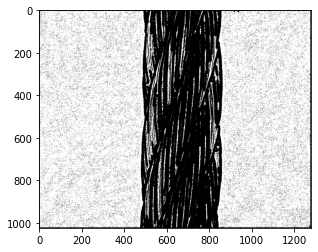

In [44]:
cv2_imshow(mask)

In [ ]:
# 获取极端点
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

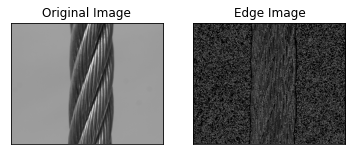

In [32]:
# canny边缘检测
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('09.png',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [34]:
import cv2 as cv
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)

第三个参数（255）：超过阈值的部分取值是多少（对于cv.THRESH_BINARY而言）

第四个参数（cv.ADAPTIVE_THRESH_MEAN_C）：
（1）在一个邻域内计算阈值所采用的算法，有两个取值，分别为 ADAPTIVE_THRESH_MEAN_C 和 ADAPTIVE_THRESH_GAUSSIAN_C
（2）ADAPTIVE_THRESH_MEAN_C的计算方法是计算出领域的平均值再减去第七个参数2的值。
（3）ADAPTIVE_THRESH_GAUSSIAN_C的计算方法是计算出领域的高斯均值再减去第七个参数2的值

第五个参数（cv.THRESH_BINARY）：这是阈值类型，只有两个取值，分别为 THRESH_BINARY 和THRESH_BINARY_INV

第六个参数（11）：adaptiveThreshold的计算单位是像素的邻域块大小选择，这是局部邻域大小，3、5、7等

第七个参数（2）：这个参数实际上是一个偏移值调整量，用均值和高斯计算阈值后，再减或加这个值就是最终阈值。

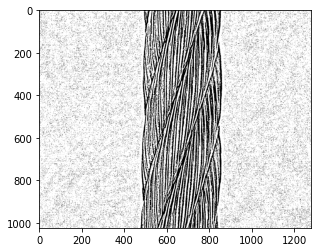

In [35]:
cv2_imshow(th2)

In [48]:
th2.shape

(1024, 1280)

In [47]:
# cv.RETR_TREE会完整建立轮廓的层级从属关系，[1]代表只获得hierarchy，它是一个包含4个值的数组：[Next, Previous, First Child, Parent]
contours1 = cv.findContours(th2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[0]
# print(contours1)
# 对轮廓的面积降序排列
contours1 = sorted(contours1, key=cv.contourArea, reverse=True)

In [53]:
# 遍历所有的轮廓
for i,error_value in enumerate(contours1):
    if i < 3:
        minArea = cv.minAreaRect(error_value)
        area = cv.contourArea(error_value)
        mask = np.zeros(imgray.shape,np.uint8)
        roi2 = cv.drawContours(mask,error_value,-1,(255,0,0),5)
        # cv.imshow('roi2', roi2)
        window_show(roi2)
        width = int(minArea[1][1])
        height = int(minArea[1][0])
        # if minArea[1][0] > minArea[1][1]:
        #     width = int(minArea[1][0])
        #     height = int(minArea[1][1])
        # else:
        #     width = int(minArea[1][1])
        #     height = int(minArea[1][0])
        # 判断轮廓的大小是否合适
        print(width,height)
        # print(w2,h2)

496 1017
439 1017
55 353


True

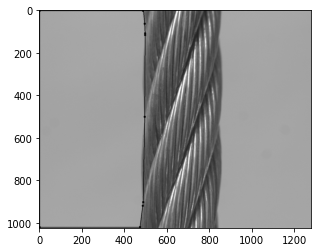

In [62]:
img = cv.imread('09.png',0)
# img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# ret,thresh = cv.threshold(img_gray, 127, 255,0)
# 获取轮廓
# contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours1[0]
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2)
    # cv.circle(img,far,5,[0,0,255],-1)
    cv.circle(img,start,5,[0,0,255],-1)
    # cv.circle(img,end,5,[0,0,255],-1)
cv2_imshow(img)
cv.imwrite('point.png',img)